<a href="https://colab.research.google.com/github/Nazeef91/ML_MODEL/blob/main/Kmean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

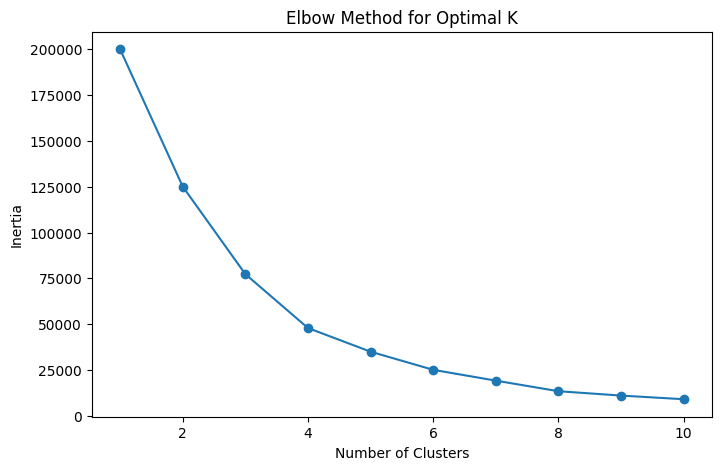

The new customer from India (Year: 2023) belongs to cluster: 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# Load dataset
file_path = "customers-100000.csv"
df = pd.read_csv(file_path)

# Selecting relevant features (e.g., Country, Subscription Date)
selected_columns = ['Country', 'Subscription Date']
data = df[selected_columns].copy()

# Convert Subscription Date to datetime and extract year
data['Subscription Year'] = pd.to_datetime(data['Subscription Date'], errors='coerce').dt.year

# Remove NaN values if any
data = data.dropna()

# Encode categorical data (Country)
le = LabelEncoder()
data['Country'] = le.fit_transform(data['Country'])

# Drop original Subscription Date column
data.drop(columns=['Subscription Date'], inplace=True)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Determine optimal number of clusters using Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Apply K-Means clustering with optimal K (assumed 4 based on elbow method)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Function to predict cluster for a new customer


In [12]:

def predict_cluster(country, subscription_year):
    if country not in le.classes_:
        print(f"Error: Country '{country}' not found in training data.")
        return None
    country_encoded = le.transform([country])[0]
    new_data_scaled = scaler.transform([[country_encoded, subscription_year]])
    cluster = kmeans.predict(new_data_scaled)[0]
    return cluster

# Example prediction
example_country = 'United States of America'  # Replace with actual country from dataset
example_year = 2023
predicted_cluster = predict_cluster(example_country, example_year)
if predicted_cluster is not None:
    print(f'The new customer from {example_country} (Year: {example_year}) belongs to cluster: {predicted_cluster}')


The new customer from United States of America (Year: 2023) belongs to cluster: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
